#Решаемая проблематика:
Повышение здоровья граждан и упрощение работы медицинского персонала.
В перспективе можно натренировать целый ряд моделей на ряд заболеваний, тем самым усилив решение проблематики.


Описание конечного процесса реализации задачи(идеи):

Есть случаи, когда назначают обыкновенный, простой «общий анализ крови»(из пальца(буквально)) и общий анализ мочи. И такие случаи не редки. Результаты этих анализов при внесении на медицинский сервер для лечащего врача будут так же передаваться моделям в автоматическом режиме. Чтобы сделать прогноз модели так же будут подгружать в автоматическом режиме ряд других данных о пациенте. В числе этих данных некоторые симптомы и диагнозы. Симптомы вносит на медицинский сервер лечащий врач при приёме пациента и они так же копией автоматически будут передаваться моделям, в случае не заполнения какого-то симптома врачом – будет позитивное автоматическое дозаполнение, что симптома нет. Диагнозы подгрузятся в модели автоматически с самой свежей датировкой, то есть если пациенту когда-то был поставлен диагноз «артериальная гипертензия» и с тех пор не было отметки о выздоровлении – значит статус по этой болезни «1»(болен), если отметка о выздоровлении была – подгрузит «0»(здоров), если же никаких данных по диагнозу у пациента вообще не было в жизни – будем считать позитивно, что «0»(здоров). После получения всех данных модели будут делать прогноз на наличие или отсутствие у пациента хронического заболевания почек, при спрогнозируемом наличии – лечащему врачу при приёме пациента выведется на экран оповещение о том, чтобы рекомендовать пациенту пройти более глубокое обследование именно почек и сдать не общие, а более подробные анализы. Вся система будет работать в фоновом(автоматическом) режиме, не требуя дополнительных действий медицинских работников.

Для работы я взял датасет отсюда:https://www.kaggle.com/datasets/colearninglounge/chronic-kidney-disease?select=kidney_disease_train.csv

In [ ]:
import pandas as pd

In [ ]:
CKD_df = pd.read_csv('Chronic_Kidney_Disease.csv')
CKD_df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,71,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,...,28.0,14600,3.2,yes,yes,no,good,no,no,ckd
276,106,50.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,17.0,6500,NaN,yes,yes,no,good,yes,yes,ckd
277,270,23.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,41.0,7200,5.0,no,no,no,good,no,no,notckd
278,348,38.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7300,6.4,no,no,no,good,no,no,notckd


Для начала разберёмся, что такое "ckd" и "notckd" в нашем датасете.

In [ ]:
clarifying_df = CKD_df[['wc', 'classification']]
clarifying_df

,wc,classification
0,7900,ckd
1,NaN,ckd
2,NaN,ckd
3,7200,notckd
4,8300,ckd
...,...,...
275,14600,ckd
276,6500,ckd
277,7200,notckd
278,7300,notckd


In [ ]:
for row in range(0, 280):
  print(type(clarifying_df.loc[row, 'wc']))

<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<c

In [ ]:
print(clarifying_df.dtypes)

wc                object
classification    object
dtype: object


Подитожим: раз большинство значений в колонке "wc" - строки, то пишет тип "object". А так как пустое значение можно внести с помощью numpy, который по идее числовой, то поэтому "NaN" это float, а не что-то другое.
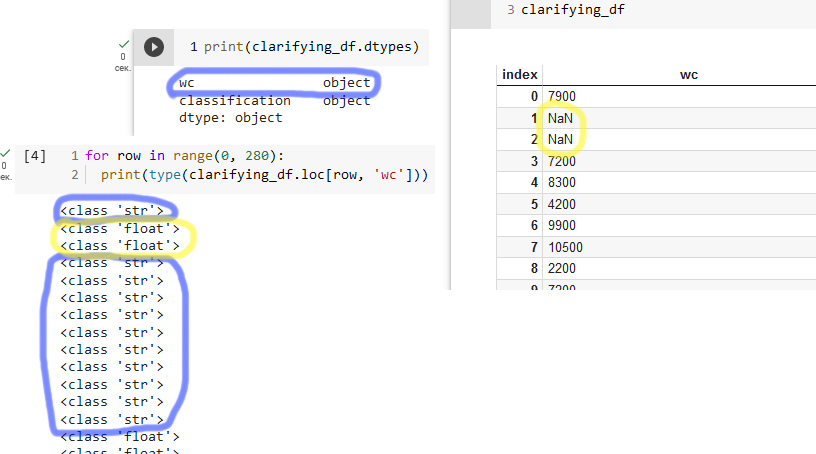

In [ ]:
import numpy as np

In [ ]:
numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
for row in range(0, 280):
  if clarifying_df.loc[row, 'wc'] == str:
    if clarifying_df.loc[row, 'wc'][0] not in numbers:
      clarifying_df.loc[row, 'wc'] = np.nan
  elif clarifying_df.loc[row, 'wc'] == '\t?':
    clarifying_df.loc[row, 'wc'] = np.nan
clarifying_df.dropna(inplace=True)
clarifying_df['wc'] = clarifying_df['wc'].astype(int)
clarifying_df['classification'] = clarifying_df['classification'].astype(str)
clarifying_df.reset_index(drop= True , inplace= True )
clarifying_df

<ipython-input-7-bf91d462741e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clarifying_df.loc[row, 'wc'] = np.nan
<ipython-input-7-bf91d462741e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clarifying_df.dropna(inplace=True)
<ipython-input-7-bf91d462741e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clarifying_df['wc'] = clarifying_df['wc'].astype(int)
<ipython-input-

,wc,classification
0,7900,ckd
1,7200,notckd
2,8300,ckd
3,4200,ckd
4,9900,notckd
...,...,...
197,14600,ckd
198,6500,ckd
199,7200,notckd
200,7300,notckd


In [ ]:
ckd_df = clarifying_df.copy()
notckd_df = clarifying_df.copy()
# делаем через ".copy()",чтобы получить самостоятельные датафреймы независимые от других.

In [ ]:
for row in range(0, 202):
  if ckd_df.loc[row, 'classification'][0] == 'n':
    ckd_df.loc[row, 'classification'] = np.nan
ckd_df.dropna(inplace=True)
ckd_df.sort_values(by=['wc'], ascending=True, inplace=True)
ckd_df

,wc,classification
6,2200,ckd
70,4100,ckd
3,4200,ckd
160,4200,ckd
9,4200,ckd
...,...,...
189,16300,ckd
146,16700,ckd
176,18900,ckd
152,21600,ckd


In [ ]:
for row in range(0, 202):
  if notckd_df.loc[row, 'classification'][0] == 'c':
    notckd_df.loc[row, 'classification'] = np.nan
notckd_df.dropna(inplace=True)
notckd_df.sort_values(by=['wc'], ascending=True, inplace=True)
notckd_df

,wc,classification
166,4300,notckd
133,4300,notckd
148,4300,notckd
21,4300,notckd
80,4500,notckd
...,...,...
57,11000,notckd
121,11000,notckd
61,11000,notckd
73,11000,notckd


Итак, что такое "ckd" и "notckd":

Как правило в данном датасете мы видим у пациентов «ckd» - более большие показатели лейкоцитов(wc), что говорит о том, что у них более явные и сильные воспалительные процессы в организме в отличие от пациентов «notckd». Из этого делаем вывод, что имеем дело с данными, составленными по принципу: «ckd» - болен, «notckd» - здоров, иначе картина количества лейкоцитов выглядела бы наоборот. Поясняю: у нас не тот случай, когда нехроническое заболевание почек(«notckd») равно активное заболевание почек(требующее стационарного лечения), у нас случай, когда нехроническое заболевание почек(«notckd») равно здоровый статус почек пациента.

Так как общий анализ крови и мочи не предполагает большое количество результатов, то возьмём из датасета следующие колонки:

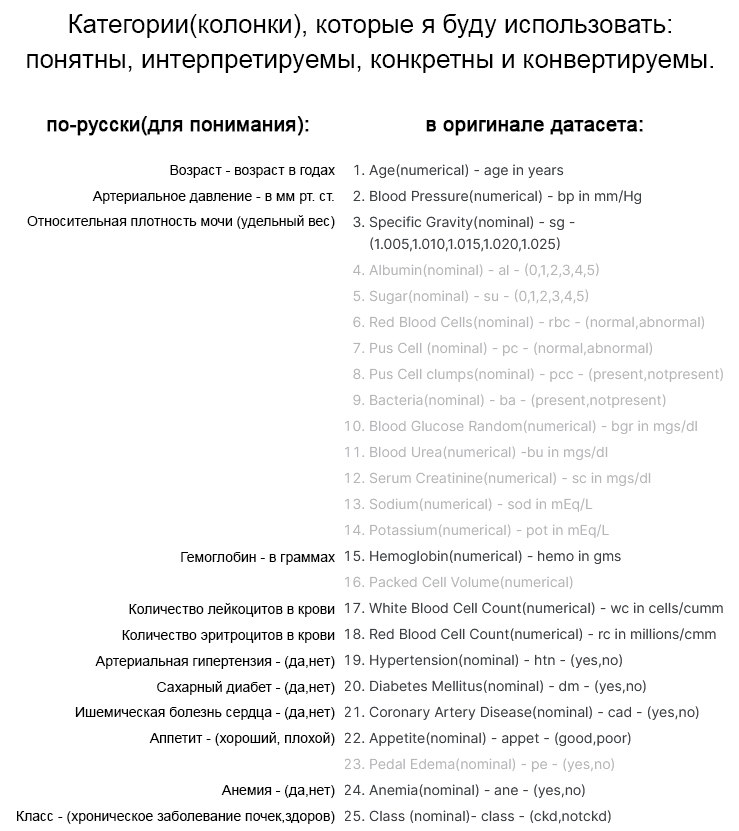

In [ ]:
# Отбросим ненужные колонки и переименуем нужные:

CKD_df = CKD_df[['age', 'bp', 'sg', 'hemo',
                 'wc', 'rc', 'htn', 'dm', 'cad',
                 'appet', 'ane', 'classification']]

CKD_df.columns = ['Возраст', 'Артериальное давление',
                  'Отн. плотн. мочи', 'Гемоглобин',
                  'Кол-во лейкоцитов в крови',
                  'Кол-во эритроцитов в крови',
                  'Артериальная гипертензия',
                  'Сахарный диабет',
                  'Ишемическая болезнь сердца',
                  'Аппетит', 'Анемия', 'Класс']
CKD_df

,Возраст,Артериальное давление,Отн. плотн. мочи,Гемоглобин,Кол-во лейкоцитов в крови,Кол-во эритроцитов в крови,Артериальная гипертензия,Сахарный диабет,Ишемическая болезнь сердца,Аппетит,Анемия,Класс
0,62.0,70.0,1.025,12.6,7900,3.9,yes,yes,no,good,no,ckd
1,54.0,70.0,NaN,11.7,NaN,NaN,no,yes,no,good,no,ckd
2,47.0,80.0,NaN,12.1,NaN,NaN,yes,no,no,poor,no,ckd
3,43.0,60.0,1.025,17.8,7200,5.5,no,no,no,good,no,notckd
4,42.0,100.0,1.015,11.1,8300,4.6,yes,no,no,poor,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...
275,46.0,60.0,1.010,9.8,14600,3.2,yes,yes,no,good,no,ckd
276,50.0,90.0,NaN,6.0,6500,NaN,yes,yes,no,good,yes,ckd
277,23.0,80.0,1.025,14.3,7200,5.0,no,no,no,good,no,notckd
278,38.0,80.0,1.020,13.6,7300,6.4,no,no,no,good,no,notckd


#Сделаем предобработку данных прежде чем подавать их моделям:
Проверим их на наличие пропусков, аномалий и выбросов, а так же скорректируем их в случае, если это наличие будет обнаружено. Заменим словестные значения на числовые.

In [ ]:
# Проверка на наличие пропусков.Количество пустых значений в процентах:
df_null = round(100*(CKD_df.isnull().sum())/len(CKD_df), 2)
df_null

Возраст                        1.79
Артериальное давление          3.21
Отн. плотн. мочи              12.86
Гемоглобин                    13.93
Кол-во лейкоцитов в крови     27.50
Кол-во эритроцитов в крови    33.21
Артериальная гипертензия       0.36
Сахарный диабет                0.36
Ишемическая болезнь сердца     0.36
Аппетит                        0.00
Анемия                         0.00
Класс                          0.00
dtype: float64

Что ж, пустых значений много, но так как общий объём имеющихся данных мал - терять их удалением нам никак нельзя. Поэтому заполним пустые значения в колонках с числовыми значениями - средними значениями. А чуть позже заполним пустые значения в колонках со словестными значениями - позитивными значениями(что симптом или диагноз отсутствует), сразу же заменяя словестные значения числовыми.

Прежде чем высчитывать средние значения нужно проверить данные на наличие аномалий и выбросов. Ведь при их наличии средние значения высчитаются некорректно. При обнаружении аномалий и выбросов мы заменим их пустыми значениями, а затем заполним и их, и остальные пустые значения средними значениями.

In [ ]:
# Проверять будем графиками.
# Прежде чем построить графики - проверим типы данных и если нужно,то приведём их в числовые типы.
print(CKD_df.dtypes)

Возраст                       float64
Артериальное давление         float64
Отн. плотн. мочи              float64
Гемоглобин                    float64
Кол-во лейкоцитов в крови      object
Кол-во эритроцитов в крови     object
Артериальная гипертензия       object
Сахарный диабет                object
Ишемическая болезнь сердца     object
Аппетит                        object
Анемия                         object
Класс                          object
dtype: object


In [ ]:
# В колонке лейкоцитов всё ещё осталась ячейка со значением "\t?".
# Она не даст нам перевести колонку в числовой тип.
# Так в какой же строчке эта ячейка? Выясним и снова заполним пустым значением.
for row in range(0, 280):
  if CKD_df.loc[row, 'Кол-во лейкоцитов в крови'] == '\t?':
    print(row)

89


In [ ]:
# Так она выглядит:
print(CKD_df.loc[89, 'Кол-во лейкоцитов в крови'])

	?


In [ ]:
# Заменим эту ячейку(а за одно и все остальные такие же если есть) пустым значением:
CKD_df.replace('\t?', np.nan, inplace=True)

<ipython-input-16-4917315cfd00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CKD_df.replace('\t?', np.nan, inplace=True)


In [ ]:
# Убедимся, что замена прошла успешно:
print(CKD_df.loc[89, 'Кол-во лейкоцитов в крови'])

nan


In [ ]:
CKD_df['Кол-во лейкоцитов в крови'] = CKD_df['Кол-во лейкоцитов в крови'].astype(float)
CKD_df['Кол-во эритроцитов в крови'] = CKD_df['Кол-во эритроцитов в крови'].astype(float)

<ipython-input-18-ca2261587086>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CKD_df['Кол-во лейкоцитов в крови'] = CKD_df['Кол-во лейкоцитов в крови'].astype(float)
<ipython-input-18-ca2261587086>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CKD_df['Кол-во эритроцитов в крови'] = CKD_df['Кол-во эритроцитов в крови'].astype(float)


In [ ]:
import matplotlib.pyplot as plt

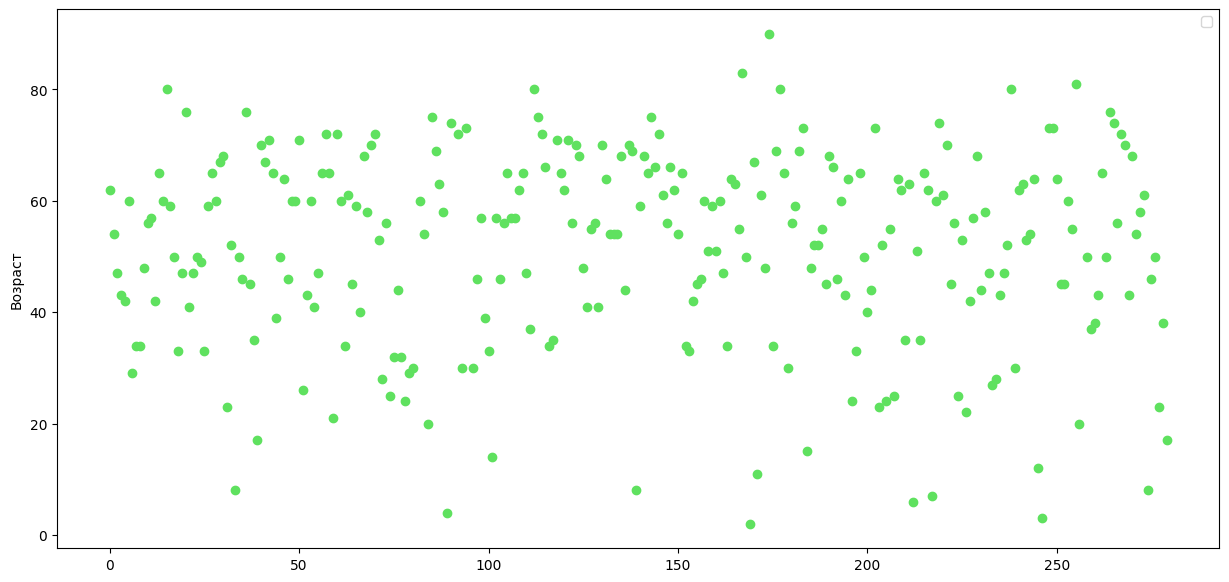

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(range(0, len(CKD_df['Возраст'])),
            CKD_df['Возраст'], c='#5fe15f')
plt.ylabel('Возраст')
plt.legend()
plt.show()

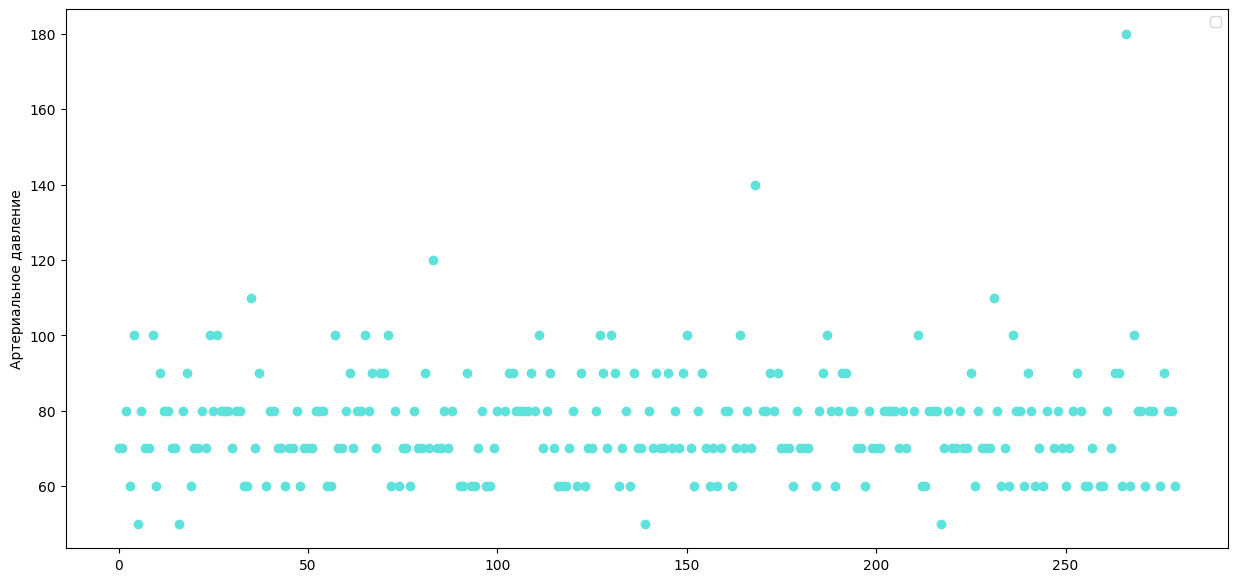

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(range(0, len(CKD_df['Артериальное давление'])),
            CKD_df['Артериальное давление'], c='#5fe1dc')
plt.ylabel('Артериальное давление')
plt.legend()
plt.show()

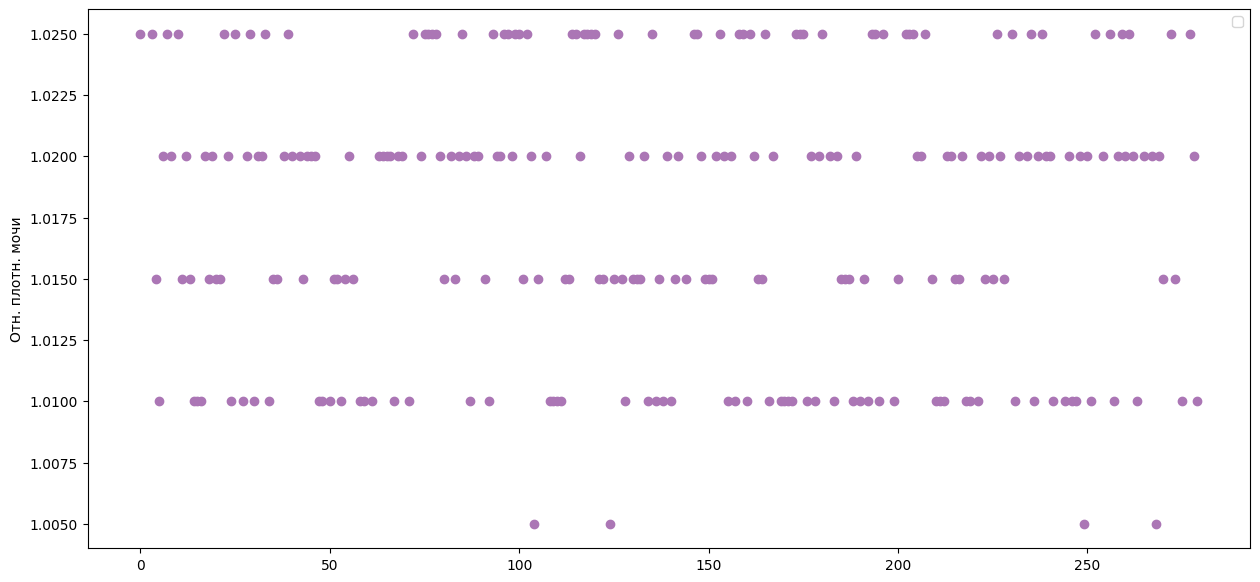

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(range(0, len(CKD_df['Отн. плотн. мочи'])),
            CKD_df['Отн. плотн. мочи'], c='#ab76b5')
plt.ylabel('Отн. плотн. мочи')
plt.legend()
plt.show()

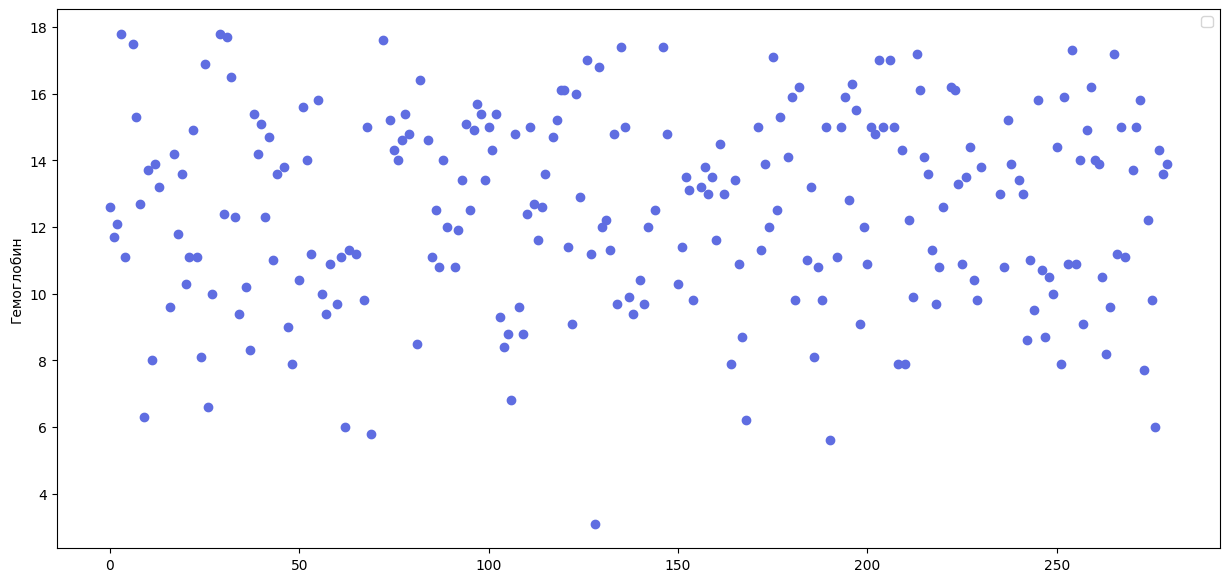

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(range(0, len(CKD_df['Гемоглобин'])),
            CKD_df['Гемоглобин'], c='#5f6de1')
plt.ylabel('Гемоглобин')
plt.legend()
plt.show()

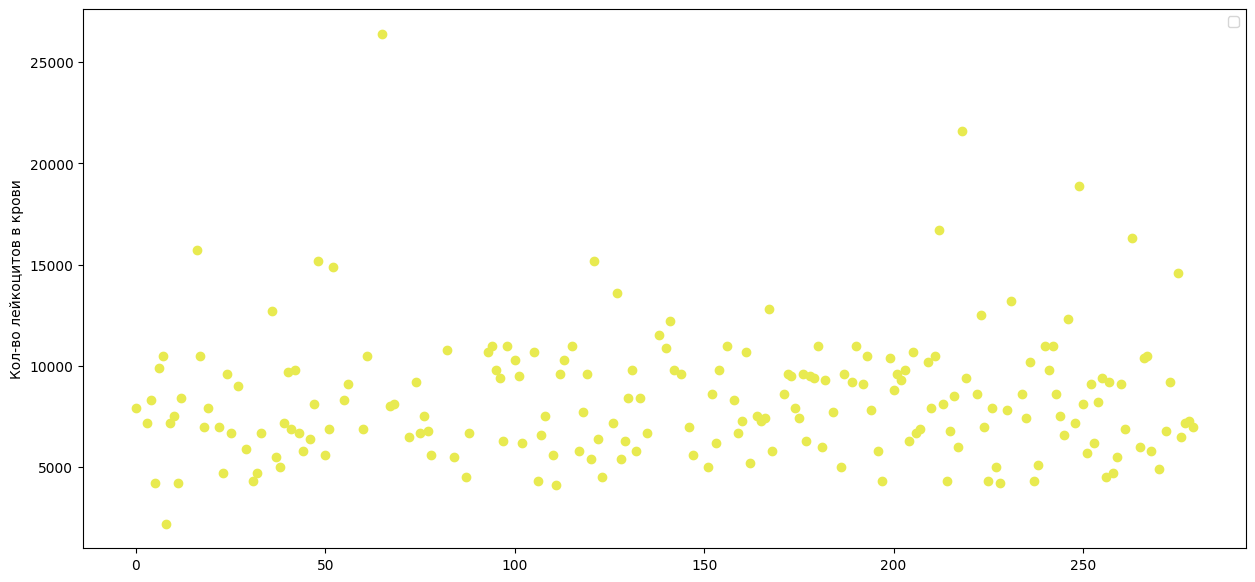

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(range(0, len(CKD_df['Кол-во лейкоцитов в крови'])),
            CKD_df['Кол-во лейкоцитов в крови'], c='#e8ea50')
plt.ylabel('Кол-во лейкоцитов в крови')
plt.legend()
plt.show()

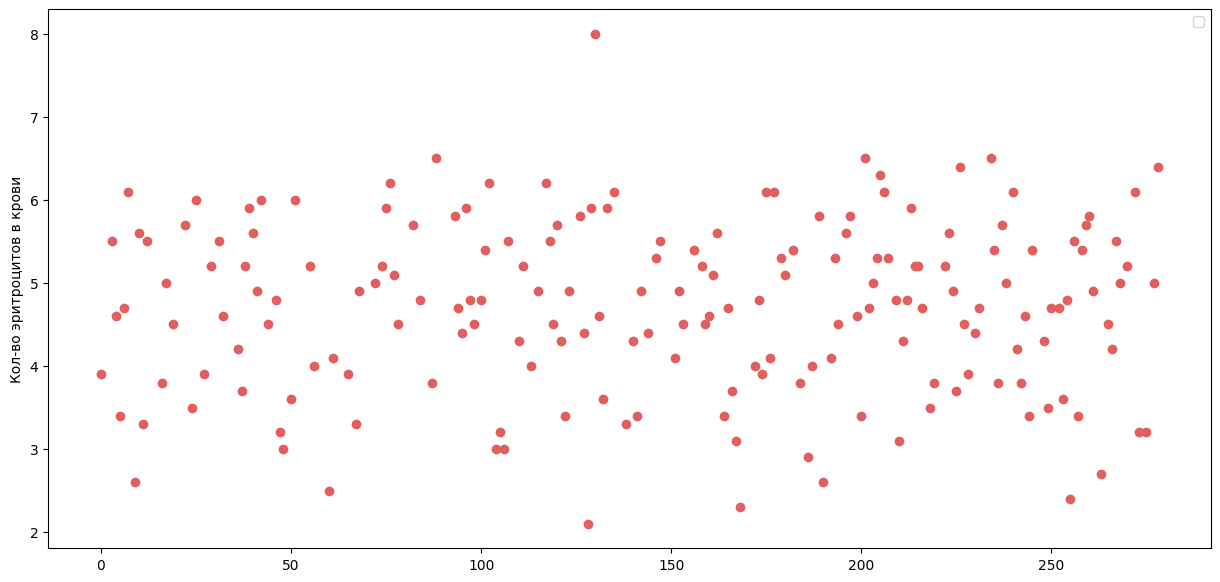

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(range(0, len(CKD_df['Кол-во эритроцитов в крови'])),
            CKD_df['Кол-во эритроцитов в крови'], c='#e15f5f')
plt.ylabel('Кол-во эритроцитов в крови')
plt.legend()
plt.show()

Судя по графикам - аномалий и выбросов в данных нет. Можем начать заполнять пропуски.

In [ ]:
CKD_df['Возраст'].fillna(round(CKD_df['Возраст'].mean()),
                         inplace = True)
CKD_df['Артериальное давление'].fillna(round(CKD_df['Артериальное давление'].mean()),
                                       inplace = True)
CKD_df['Отн. плотн. мочи'].fillna(round(CKD_df['Отн. плотн. мочи'].mean(), 3),
                                  inplace = True)
CKD_df['Гемоглобин'].fillna(round(CKD_df['Гемоглобин'].mean(), 1),
                            inplace = True)
CKD_df['Кол-во лейкоцитов в крови'].fillna(round(CKD_df['Кол-во лейкоцитов в крови'].mean()),
                                           inplace = True)
CKD_df['Кол-во эритроцитов в крови'].fillna(round(CKD_df['Кол-во эритроцитов в крови'].mean(), 1),
                                            inplace = True)

<ipython-input-26-71033777ede9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CKD_df['Возраст'].fillna(round(CKD_df['Возраст'].mean()),
<ipython-input-26-71033777ede9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CKD_df['Артериальное давление'].fillna(round(CKD_df['Артериальное давление'].mean()),
<ipython-input-26-71033777ede9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CKD_df['Отн. плотн. мочи'].fillna(round(CKD_df['Отн.

Теперь данные в колонках со словестными значениями.

In [ ]:
CKD_df.replace('yes', 1, inplace=True)
CKD_df.replace('\tyes', 1, inplace=True)
CKD_df.replace('no', 0, inplace=True)
CKD_df.replace('\tno', 0, inplace=True)
CKD_df.replace('good', 1, inplace=True)
CKD_df.replace('poor', 0, inplace=True)
CKD_df.replace('ckd', 1, inplace=True)
CKD_df.replace('notckd', 0, inplace=True)
CKD_df.fillna(value=0, inplace=True)

<ipython-input-27-5c8ecfa775a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CKD_df.replace('yes', 1, inplace=True)
<ipython-input-27-5c8ecfa775a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CKD_df.replace('\tyes', 1, inplace=True)
<ipython-input-27-5c8ecfa775a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CKD_df.replace('no', 0, inplace=True)
<ipython-input-27-5c8ecfa775a6>:4: SettingWithCopyWarning: 
A value is trying 

In [ ]:
# Удостоверимся,что пустых значений не осталось.
# Вновь проверка на наличие пропусков.Количество пустых значений в процентах:
df_null = round(100*(CKD_df.isnull().sum())/len(CKD_df), 2)
df_null

Возраст                       0.0
Артериальное давление         0.0
Отн. плотн. мочи              0.0
Гемоглобин                    0.0
Кол-во лейкоцитов в крови     0.0
Кол-во эритроцитов в крови    0.0
Артериальная гипертензия      0.0
Сахарный диабет               0.0
Ишемическая болезнь сердца    0.0
Аппетит                       0.0
Анемия                        0.0
Класс                         0.0
dtype: float64

In [ ]:
# Контрольная проверка на типы данных перед подачей в модели:
print(CKD_df.dtypes)

Возраст                       float64
Артериальное давление         float64
Отн. плотн. мочи              float64
Гемоглобин                    float64
Кол-во лейкоцитов в крови     float64
Кол-во эритроцитов в крови    float64
Артериальная гипертензия      float64
Сахарный диабет               float64
Ишемическая болезнь сердца    float64
Аппетит                         int64
Анемия                          int64
Класс                           int64
dtype: object


In [ ]:
# Посмотрим как теперь выглядит наш датафрейм.
CKD_df

,Возраст,Артериальное давление,Отн. плотн. мочи,Гемоглобин,Кол-во лейкоцитов в крови,Кол-во эритроцитов в крови,Артериальная гипертензия,Сахарный диабет,Ишемическая болезнь сердца,Аппетит,Анемия,Класс
0,62.0,70.0,1.025,12.6,7900.0,3.9,1.0,1.0,0.0,1,0,1
1,54.0,70.0,1.017,11.7,8355.0,4.7,0.0,1.0,0.0,1,0,1
2,47.0,80.0,1.017,12.1,8355.0,4.7,1.0,0.0,0.0,0,0,1
3,43.0,60.0,1.025,17.8,7200.0,5.5,0.0,0.0,0.0,1,0,0
4,42.0,100.0,1.015,11.1,8300.0,4.6,1.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
275,46.0,60.0,1.010,9.8,14600.0,3.2,1.0,1.0,0.0,1,0,1
276,50.0,90.0,1.017,6.0,6500.0,4.7,1.0,1.0,0.0,1,1,1
277,23.0,80.0,1.025,14.3,7200.0,5.0,0.0,0.0,0.0,1,0,0
278,38.0,80.0,1.020,13.6,7300.0,6.4,0.0,0.0,0.0,1,0,0


Разделим данные на входные и выходные.

In [ ]:
x = CKD_df[CKD_df.columns[:-1]]
y = CKD_df['Класс']

Разделим данные ещё - на тренировочные(обучающие модели) и проверочные(для тестирования работы моделей после обучения).

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Так как данных мало,то в тестовую выборку возьмём поменьше - 10%.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

# Начнём работу с моделями.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knnc = KNeighborsClassifier()
knnc.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
test_prediction_of_knnc = knnc.predict(x_test)
test_prediction_of_knnc

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score # Доля правильных ответов(другая точность)
from sklearn.metrics import precision_score # Точность
from sklearn.metrics import recall_score # Полнота
from sklearn.metrics import f1_score # F-мера

In [ ]:
knnc_accuracy = accuracy_score(y_test, test_prediction_of_knnc)
print(knnc_accuracy)

0.7142857142857143


In [ ]:
knnc_precision = precision_score(y_test, test_prediction_of_knnc, average=None)
print(knnc_precision)

[0.66666667 0.75      ]


In [ ]:
knnc_recall = recall_score(y_test, test_prediction_of_knnc, average=None)
print(knnc_recall)

[0.66666667 0.75      ]


In [ ]:
knnc_f_score = f1_score(y_test, test_prediction_of_knnc, average=None)
print(knnc_f_score)

[0.66666667 0.75      ]


Что ж, показатели по метрикам не очень хороши, но классификация вполне рабочая.

Возьмём ещё одну модель-классификатор и сравним с предыдущей.

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [ ]:
test_prediction_of_svc = svc.predict(x_test)
test_prediction_of_svc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

Уже на данном этапе видно, что модель работает очень плохо для нашей задачи и при использовании в реальной эксплуатации будет создавать одни проблемы, так как будет рекомендовать глубокое обследование всем и каждому, а это будет перегружать лишней работой медицинский персонал, в этом нет никакого смысла. Но всё же глянем и на метрики.

In [ ]:
svc_accuracy = accuracy_score(y_test, test_prediction_of_svc)
print(svc_accuracy)

0.5714285714285714


In [ ]:
svc_precision = precision_score(y_test, test_prediction_of_svc, average=None)
print(svc_precision)

[0.         0.57142857]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svc_recall = recall_score(y_test, test_prediction_of_svc, average=None)
print(svc_recall)

[0. 1.]


In [ ]:
svc_f_score = f1_score(y_test, test_prediction_of_svc, average=None)
print(svc_f_score)

[0.         0.72727273]


Что ж, результаты метрик лишь подтверждают мои слова. Модель однозначно не подходит нам.

Попробуем ещё одну модель.

In [ ]:
from sklearn import tree

In [ ]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
test_prediction_of_dtc = dtc.predict(x_test)
test_prediction_of_dtc

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0])

In [ ]:
dtc_accuracy = accuracy_score(y_test, test_prediction_of_dtc)
print(dtc_accuracy)

0.9642857142857143


In [ ]:
dtc_precision = precision_score(y_test, test_prediction_of_dtc, average=None)
print(dtc_precision)

[1.         0.94117647]


In [ ]:
dtc_recall = recall_score(y_test, test_prediction_of_dtc, average=None)
print(dtc_recall)

[0.91666667 1.        ]


In [ ]:
dtc_f_score = f1_score(y_test, test_prediction_of_dtc, average=None)
print(dtc_f_score)

[0.95652174 0.96969697]


Итак мы видим, что дерево решений показывает хорошие результаты и работает эффективнее двух первых моделей. Выбирая какую-то одну модель - я бы взял дерево решений в данном случае.

Но для функционирования сервиса лучше взять две модели. В нашем случае - k-ближайших соседей и дерево решений. Для повышения эффективности работы сервиса они будут работать обе, каждая параллельно от другой будет принимать данные и делать прогноз, и только в случае, если они обе спрогнозируют рекомендацию, то только тогда врачу выйдет оповещение рекомендовать более глубокое обследование. Это уменьшит количество излишних обследований, при этом и количество упущенных случаев заболевания тоже.

С помощью корреляционной матрицы посмотрим какие рекомендации можно дать вам уже сейчас, чтобы такой сервис молча сказал, что вы здоровы.

In [ ]:
import seaborn as sb

<Axes: >

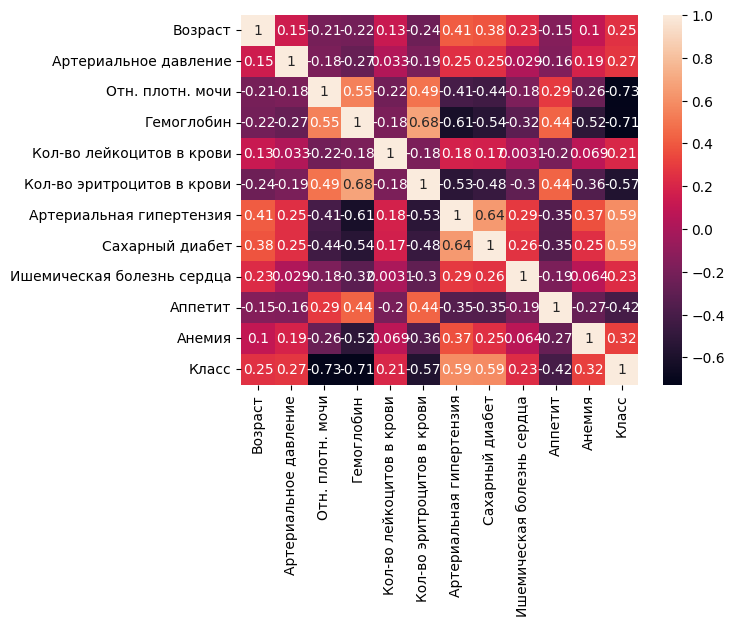

In [ ]:
corr_matrix = CKD_df.corr()
sb.heatmap(corr_matrix, annot=True)

Самую большую взаимосвязь хронического заболевания почек мы видим с показателями анализа мочи, неудивительно, ведь почки отвечают за переработку питья человека. Чем больше вы чувствуете слабость и усталость, тем меньше уровень гемоглобина и тем больше вероятность хронического заболевания почек, поэтому старайтесь непереутомляться. Чем больше аппетит, тем меньше вероятность хронического заболевания почек, поэтому хорошо и правильно питайтесь. Чем больше артериальное давление и артериальная гипертензия, тем больше и вероятность хронического заболевания почек, к тому же наличие Ишемической болезни сердца тоже увеличивает вероятность хронического заболевания почек, поэтому старайтесь поменьше переживать и волноваться. Ну и старайтесь поменьше болеть, ведь все болезни и нездоровые симптомы увеличивают вероятность хронического заболевания почек.

В настоящем, представляемом датасете мало строчек данных, зато категорий целых 11 колонок, то есть 11 штук. Мой проект прекрасно подходит для использования в собеседовании,ради которого не имеет смысл тратить много ресурсов, при приёме на работу в медицинскую сферу, и при назначенном техническом задании по осуществлению моего проекта – можно будет взять достаточно много данных(и актуальных) от работодателя, получив на это некоторые права и возможности, и уже сделать хорошо натренированные и актуальные модели. Всё равно этот сервис не сделает один программист, хотя бы потому, что ему попросту не дадут столько прав доступа, но один программист сделает эту часть(область) сервиса по тренировке моделей,приёму данных и выдаче результатов их анализа, поэтому реализовывать это будут несколько программистов. Чтобы получить в итоге качественный сервис – нужно тренировать модели на свежих конфиденциальных данных, которых заранее до приёма на должность и получения задания – не получить, поэтому и слишком тренировать этот прототип для собеседования не стоит.